In [23]:
import os
import warnings; warnings.filterwarnings('ignore')
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px

sns.set_theme(style='whitegrid')
pd.set_option('display.max_columns', None)
%matplotlib inline

## Load Data
Reads from `../data/data.csv`.

In [24]:
data_path = '../data/data.csv'
df = pd.read_csv(data_path)
print(f'Shape: {df.shape}')
df.head()

Shape: (30000, 24)


,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default
0,20000,2,2,1,24,2,2,-1,-1,-2,-2,3913,3102,689,0,0,0,0,689,0,0,0,0,1
1,120000,2,2,2,26,-1,2,0,0,0,2,2682,1725,2682,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,90000,2,2,2,34,0,0,0,0,0,0,29239,14027,13559,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,50000,2,2,1,37,0,0,0,0,0,0,46990,48233,49291,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,50000,1,2,1,57,-1,0,-1,0,0,0,8617,5670,35835,20940,19146,19131,2000,36681,10000,9000,689,679,0


## Overview
Basic info and summary statistics.

In [25]:
print('Basic Info:')
df.info()

df.describe(include='all').T

Basic Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 24 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   LIMIT_BAL  30000 non-null  int64
 1   SEX        30000 non-null  int64
 2   EDUCATION  30000 non-null  int64
 3   MARRIAGE   30000 non-null  int64
 4   AGE        30000 non-null  int64
 5   PAY_0      30000 non-null  int64
 6   PAY_2      30000 non-null  int64
 7   PAY_3      30000 non-null  int64
 8   PAY_4      30000 non-null  int64
 9   PAY_5      30000 non-null  int64
 10  PAY_6      30000 non-null  int64
 11  BILL_AMT1  30000 non-null  int64
 12  BILL_AMT2  30000 non-null  int64
 13  BILL_AMT3  30000 non-null  int64
 14  BILL_AMT4  30000 non-null  int64
 15  BILL_AMT5  30000 non-null  int64
 16  BILL_AMT6  30000 non-null  int64
 17  PAY_AMT1   30000 non-null  int64
 18  PAY_AMT2   30000 non-null  int64
 19  PAY_AMT3   30000 non-null  int64
 20  PAY_AMT4   30000 non-null  int64
 21  

,count,mean,std,min,25%,50%,75%,max
LIMIT_BAL,30000.0,167484.322667,129747.661567,10000.0,50000.00,140000.0,240000.00,1000000.0
SEX,30000.0,1.603733,0.489129,1.0,1.00,2.0,2.00,2.0
EDUCATION,30000.0,1.853133,0.790349,0.0,1.00,2.0,2.00,6.0
MARRIAGE,30000.0,1.551867,0.521970,0.0,1.00,2.0,2.00,3.0
AGE,30000.0,35.485500,9.217904,21.0,28.00,34.0,41.00,79.0
PAY_0,30000.0,-0.016700,1.123802,-2.0,-1.00,0.0,0.00,8.0
PAY_2,30000.0,-0.133767,1.197186,-2.0,-1.00,0.0,0.00,8.0
PAY_3,30000.0,-0.166200,1.196868,-2.0,-1.00,0.0,0.00,8.0
PAY_4,30000.0,-0.220667,1.169139,-2.0,-1.00,0.0,0.00,8.0
PAY_5,30000.0,-0.266200,1.133187,-2.0,-1.00,0.0,0.00,8.0


## Missing Values
Count and bar chart per column.

In [26]:
missing = df.isna().sum()
missing = missing[missing > 0].sort_values(ascending=False)
if missing.empty:
    print('No missing values.')
else:
    plt.figure(figsize=(10, max(3, 0.25*len(missing))))
    sns.barplot(x=missing.values, y=missing.index, palette='viridis')
    plt.title('Missing Values per Column')
    plt.xlabel('Count')
    plt.ylabel('Column')
    plt.tight_layout()
    plt.savefig('../figures/eda_missing_values.png', dpi=300, bbox_inches='tight')
    plt.show()
missing

No missing values.


Series([], dtype: int64)

## Feature Types
Split into numeric and categorical.

In [27]:
# Feature types per dataset description
categorical_cols = [c for c in [
    'SEX', 'EDUCATION', 'MARRIAGE',
    'PAY_0', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6',
    'default'
] if c in df.columns]

for c in categorical_cols:
    df[c] = df[c].astype('category')

numeric_cols = [c for c in df.columns if c not in categorical_cols]

print(f'Numeric features: {len(numeric_cols)}')
print(f'Categorical features: {len(categorical_cols)}')
numeric_cols, categorical_cols

Numeric features: 14
Categorical features: 10


(['LIMIT_BAL',
  'AGE',
  'BILL_AMT1',
  'BILL_AMT2',
  'BILL_AMT3',
  'BILL_AMT4',
  'BILL_AMT5',
  'BILL_AMT6',
  'PAY_AMT1',
  'PAY_AMT2',
  'PAY_AMT3',
  'PAY_AMT4',
  'PAY_AMT5',
  'PAY_AMT6'],
 ['SEX',
  'EDUCATION',
  'MARRIAGE',
  'PAY_0',
  'PAY_2',
  'PAY_3',
  'PAY_4',
  'PAY_5',
  'PAY_6',
  'default'])

## Numeric Distributions
Histograms with KDE.

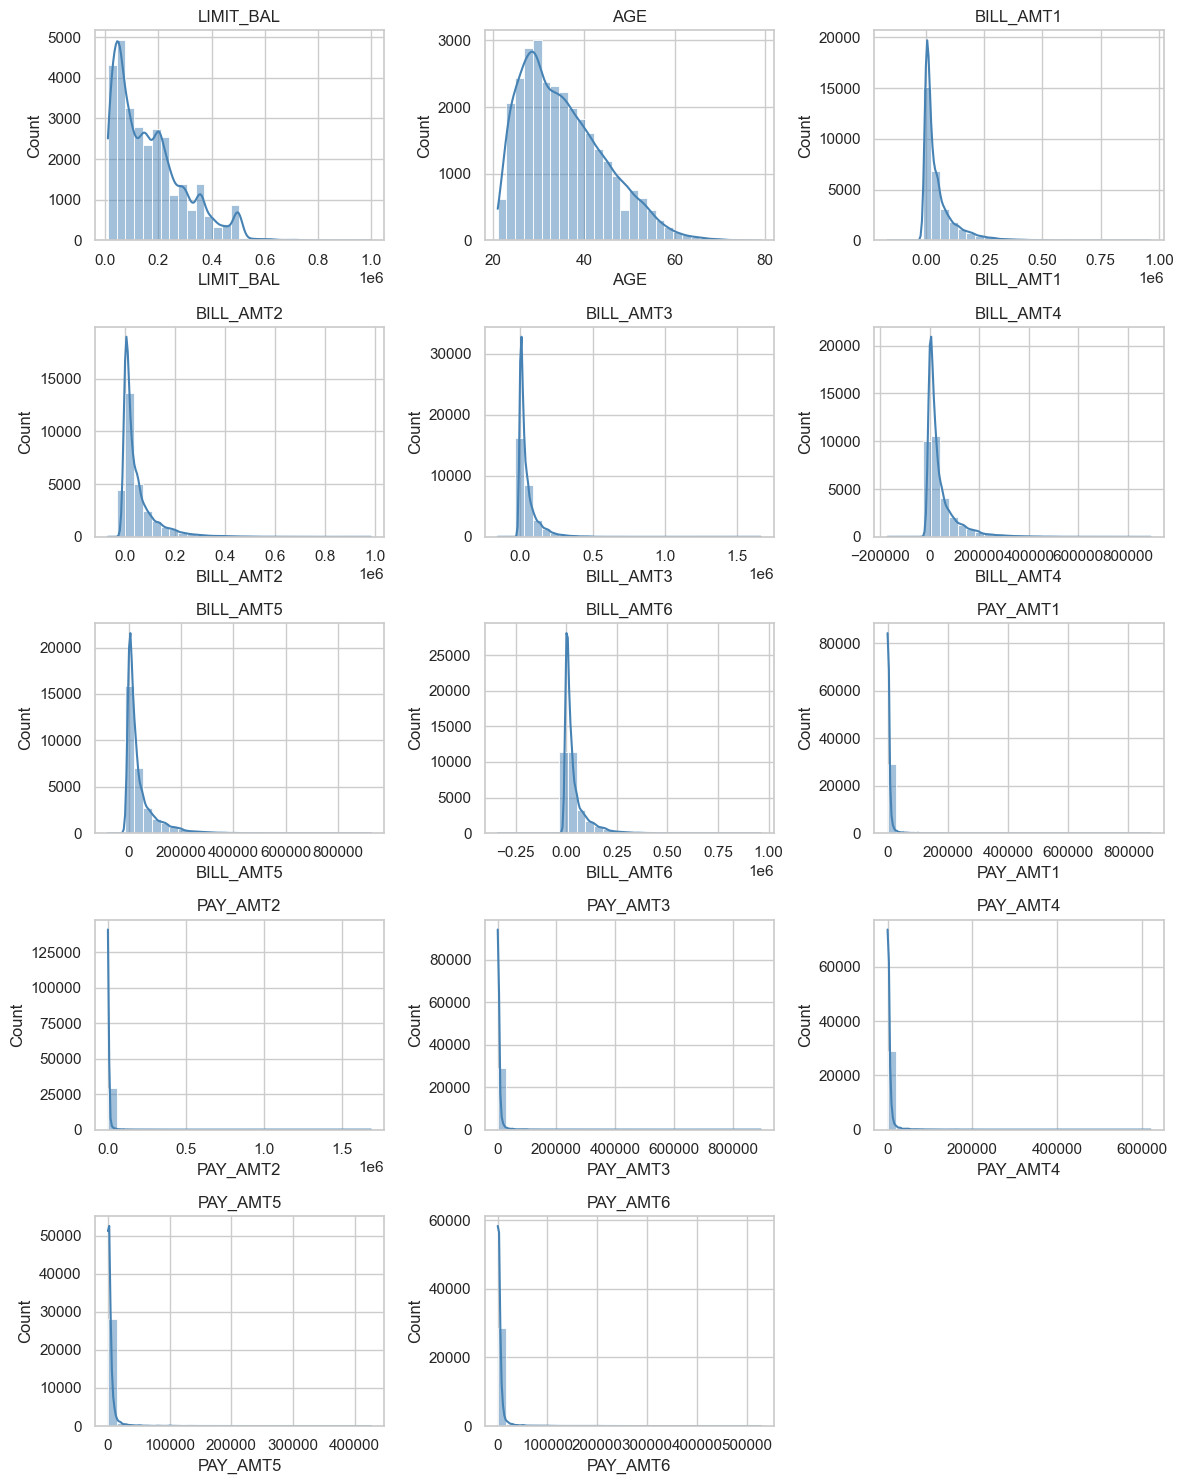

In [28]:
n = len(numeric_cols)
if n == 0:
    print('No numeric features.')
else:
    cols = 3
    rows = int(np.ceil(n/cols))
    fig, axes = plt.subplots(rows, cols, figsize=(cols*4, rows*3))
    axes = np.array(axes).reshape(-1)
    for i, col in enumerate(numeric_cols):
        ax = axes[i]
        sns.histplot(df[col].dropna(), bins=30, kde=True, ax=ax, color='steelblue')
        ax.set_title(col)
    total_axes = len(axes)
    for j in range(n, total_axes):
        fig.delaxes(axes[j])
    #fig.suptitle('Numeric Feature Distributions', y=0.995)
    plt.tight_layout()
    plt.savefig('../figures/eda_numeric_distributions.png', dpi=300, bbox_inches='tight')
    plt.show()

## Categorical Distributions
Count plots (top 20 categories).

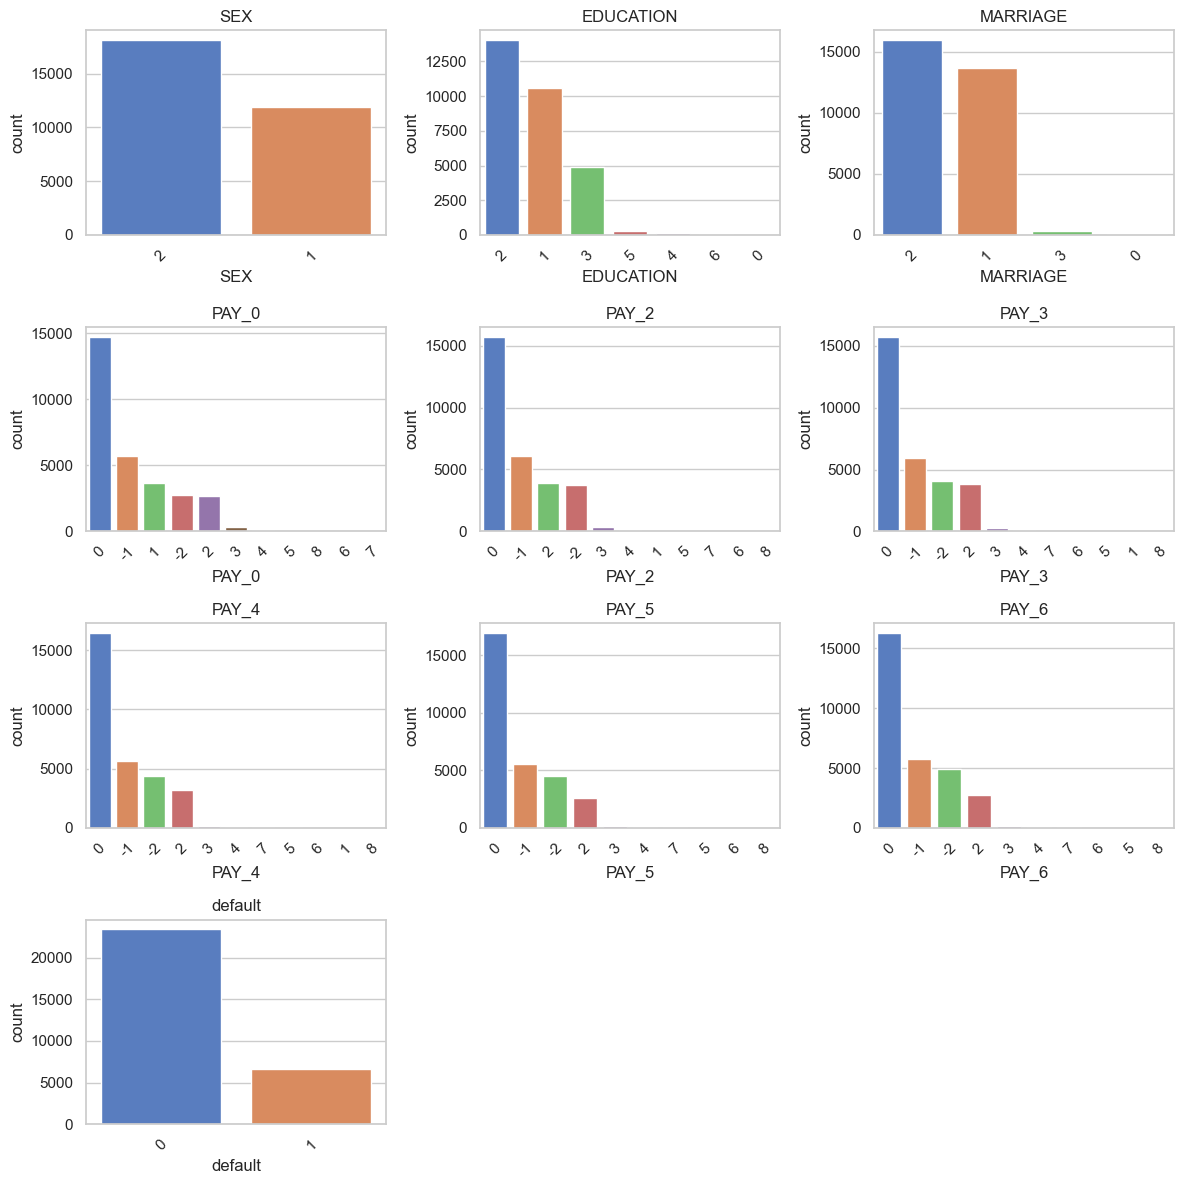

In [29]:
m = len(categorical_cols)
if m == 0:
    print('No categorical features.')
else:
    cols = 3
    rows = int(np.ceil(m/cols))
    fig, axes = plt.subplots(rows, cols, figsize=(cols*4, rows*3))
    axes = np.array(axes).reshape(-1)
    for i, col in enumerate(categorical_cols):
        ax = axes[i]
        order = df[col].value_counts(dropna=False).index[:20]
        sns.countplot(data=df, x=col, order=order, ax=ax, palette='muted')
        ax.set_title(col)
        ax.tick_params(axis='x', rotation=45)
    total_axes = len(axes)
    for j in range(m, total_axes):
        fig.delaxes(axes[j])
    #fig.suptitle('Categorical Feature Distributions', y=0.995)
    plt.tight_layout()
    plt.savefig('../figures/eda_categorical_distributions.png', dpi=300, bbox_inches='tight')
    plt.show()

## Correlation
Heatmap for numeric features.

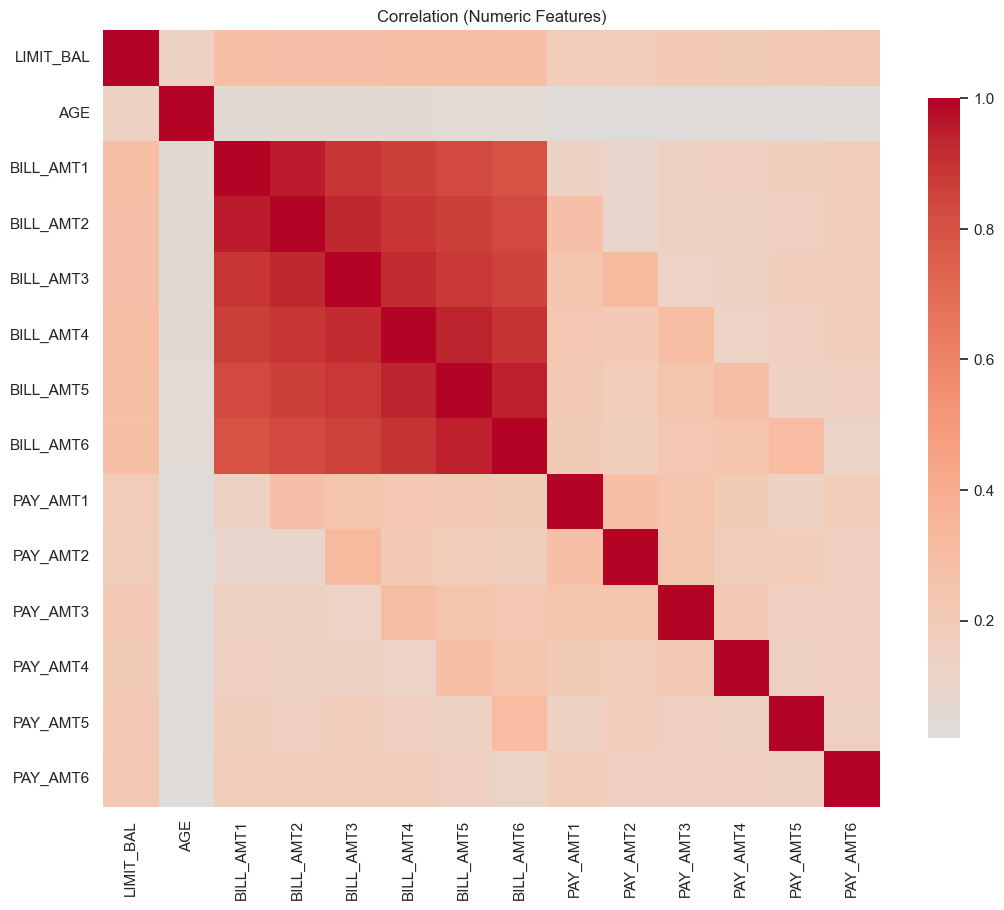

In [30]:
corr = df[numeric_cols].corr()
plt.figure(figsize=(min(12, 0.5*len(numeric_cols)+4), min(10, 0.5*len(numeric_cols)+4)))
sns.heatmap(corr, cmap='coolwarm', center=0, square=True, cbar_kws={'shrink':0.7})
plt.title('Correlation (Numeric Features)')
plt.tight_layout()
plt.savefig('../figures/eda_correlation_heatmap.png', dpi=300, bbox_inches='tight')
plt.show()

## Target
Detect and show class distribution if present.

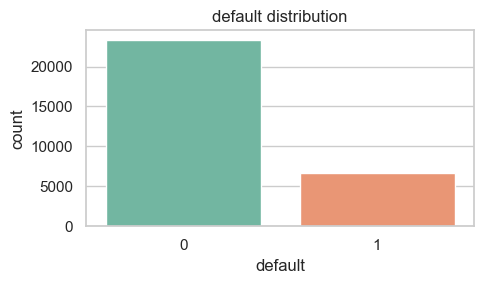

In [31]:
target = 'default'
plt.figure(figsize=(5,3))
order = df[target].value_counts().index
sns.countplot(data=df, x=target, order=order, palette='Set2')
plt.title(f'{target} distribution')
plt.tight_layout()
plt.savefig('../figures/eda_target_distribution.png', dpi=300, bbox_inches='tight')
plt.show()

## Target vs Features
Box plots and stacked counts (samples).

In [32]:
if target is not None:
    # Numeric vs target
    num_sample = numeric_cols[:6]
    if len(num_sample) > 0:
        cols = 3
        rows = int(np.ceil(len(num_sample)/cols))
        fig, axes = plt.subplots(rows, cols, figsize=(cols*4, rows*3))
        axes = np.array(axes).reshape(-1)
        for i, col in enumerate(num_sample):
            ax = axes[i]
            sns.boxplot(data=df, x=target, y=col, ax=ax, palette='Set3')
            ax.set_title(f'{col} by {target}')
        total_axes = len(axes)
        for j in range(len(num_sample), total_axes):
            fig.delaxes(axes[j])
        plt.tight_layout()
        plt.savefig('../figures/eda_numeric_vs_target.png', dpi=300, bbox_inches='tight')
        plt.show()
    # Categorical vs target
    cat_sample = categorical_cols[:6]
    if len(cat_sample) > 0:
        cols = 3
        rows = int(np.ceil(len(cat_sample)/cols))
        fig, axes = plt.subplots(rows, cols, figsize=(cols*4, rows*3))
        axes = np.array(axes).reshape(-1)
        for i, col in enumerate(cat_sample):
            ax = axes[i]
            top = df[col].value_counts().index[:10]
            tmp = df[df[col].isin(top)]
            sns.countplot(data=tmp, x=col, hue=target, ax=ax, palette='pastel')
            ax.set_title(f'{col} vs {target}')
            ax.tick_params(axis='x', rotation=45)
        total_axes = len(axes)
        for j in range(len(cat_sample), total_axes):
            fig.delaxes(axes[j])
        plt.savefig('../figures/eda_categorical_vs_target.png', dpi=300, bbox_inches='tight')

        plt.show()        plt.show()

SyntaxError: invalid syntax (2205109917.py, line 38)

## Pairplot (Sample)
Quick look at relationships (sampled).

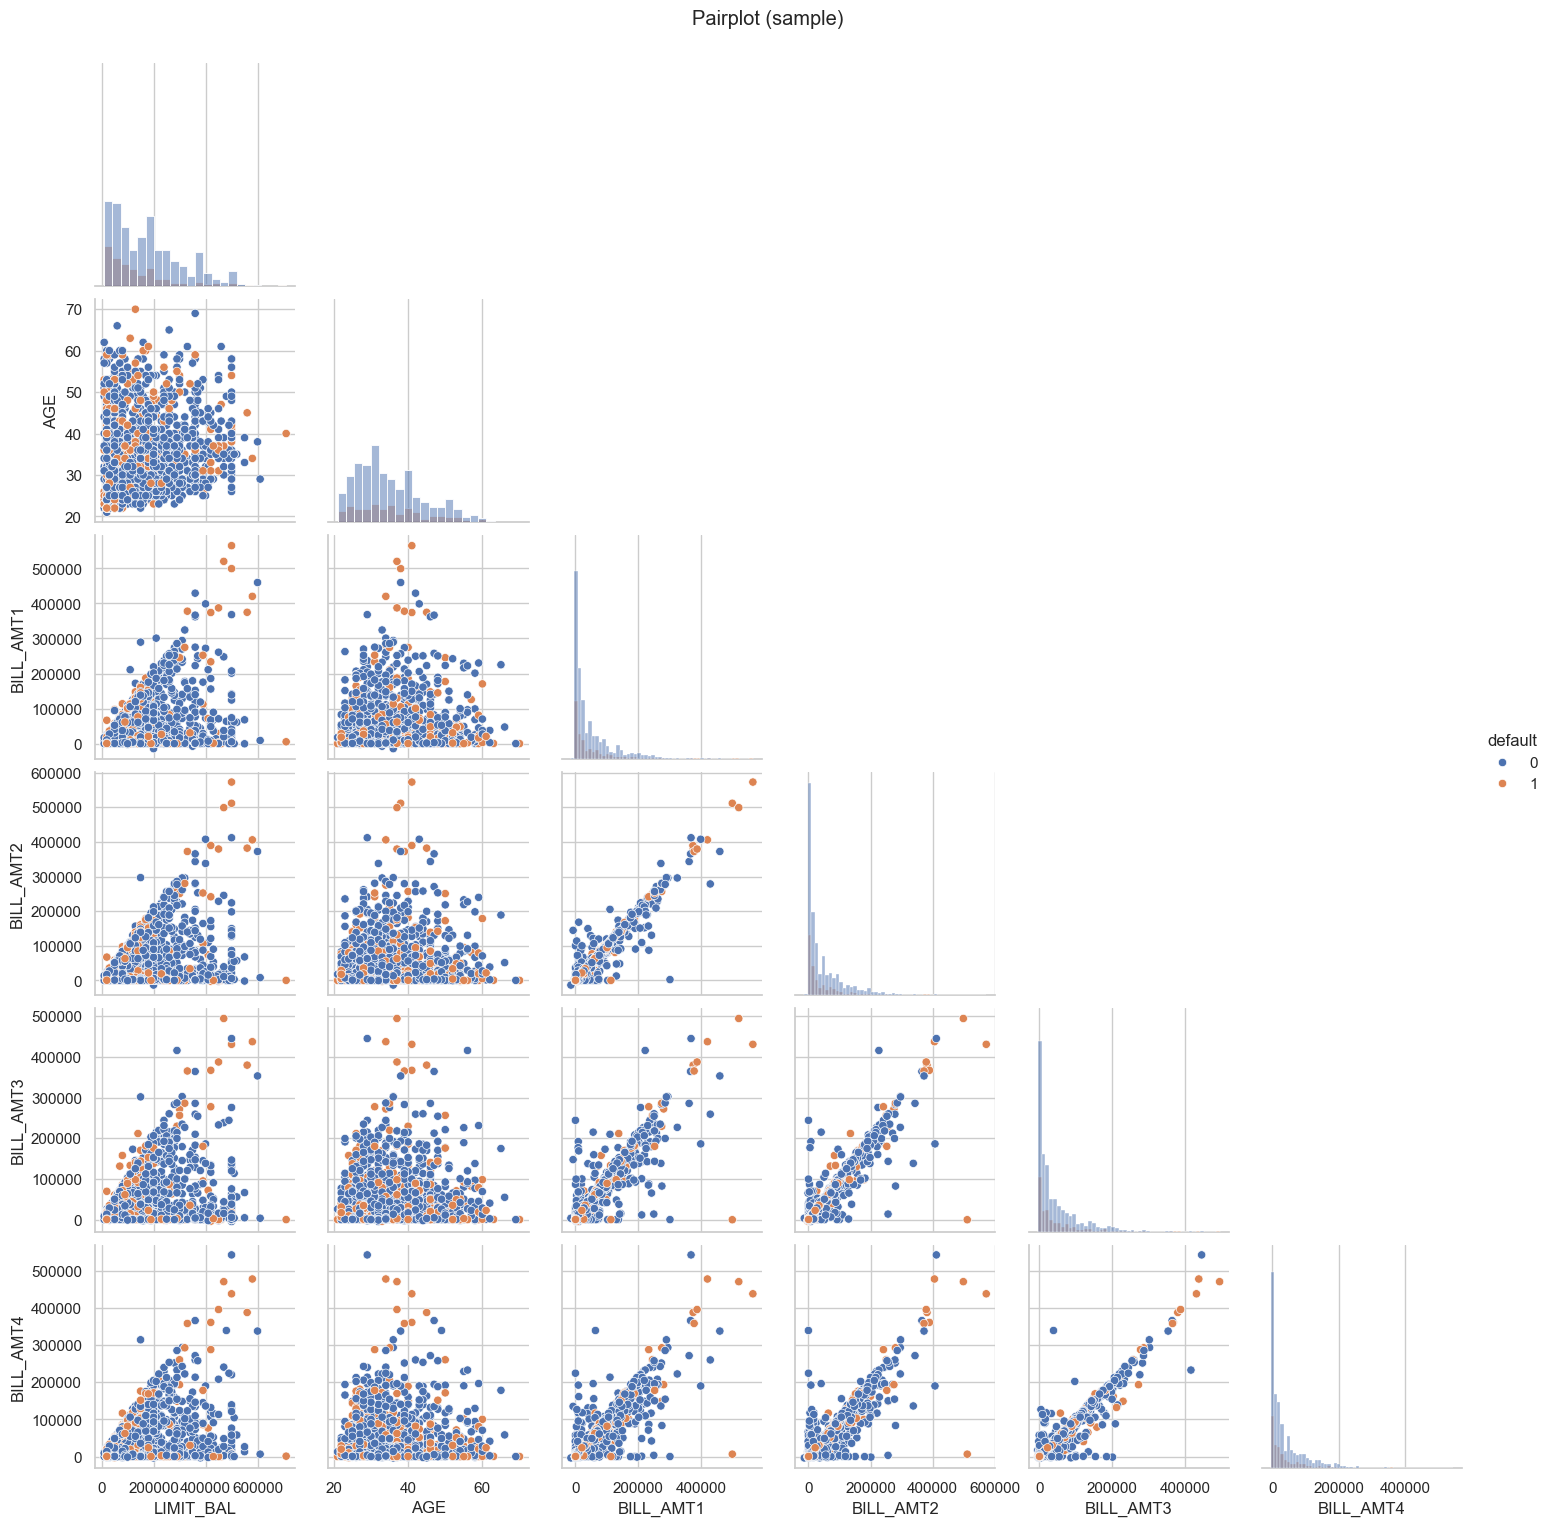

In [ ]:
if len(numeric_cols) >= 2:
    sample_cols = numeric_cols[:6]
    sample_df = df[sample_cols.copy()]
    if target is not None:
        sample_df[target] = df[target]
    sample_df = sample_df.sample(n=min(1500, len(sample_df)), random_state=42)
    g = sns.pairplot(sample_df, hue=target if target is not None else None, corner=True, diag_kind='hist')
    plt.suptitle('Pairplot (sample)', y=1.02)
    g.savefig('../figures/eda_pairplot.png', dpi=300, bbox_inches='tight')

## Interactive Scatter Matrix
Plotly (sample of rows).

In [ ]:
cols = numeric_cols[:5]
smp = df[cols].sample(n=min(1000, len(df)), random_state=42)
fig = px.scatter_matrix(smp)
fig.update_traces(diagonal_visible=False)
fig.update_layout(title='Interactive Scatter Matrix (sample)')
fig.show()